## Deep Learning
# Image Classification with Convolutional Neural Networks (CNN)
Sumudu Tennakoon, PhD

To learn more about Python, refer to the Offcial website.

* Python : www.python.org

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Seaborn: https://seaborn.pydata.org/
* TensorFlow: https://www.tensorflow.org/
* Keras: https://keras.io/

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

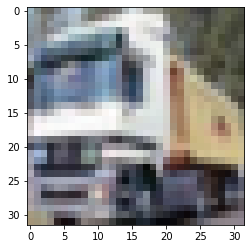

In [ ]:
plt.imshow(X_train[1])

In [ ]:
print("Traing Images Array Size:", X_train.shape)
print("Traing Lebel Array Size:", y_train.shape)

Traing Images Array Size: (50000, 32, 32, 3)
Traing Lebel Array Size: (50000, 1)


In [ ]:
class_names_to_number = {0:'airplane', 
                         1:'automobile', 
                         2:'bird', 
                         3:'cat', 
                         4:'deer',
                         5:'dog', 
                         6:'frog', 
                         7:'horse', 
                         8:'ship', 
                         9:'truck'
}

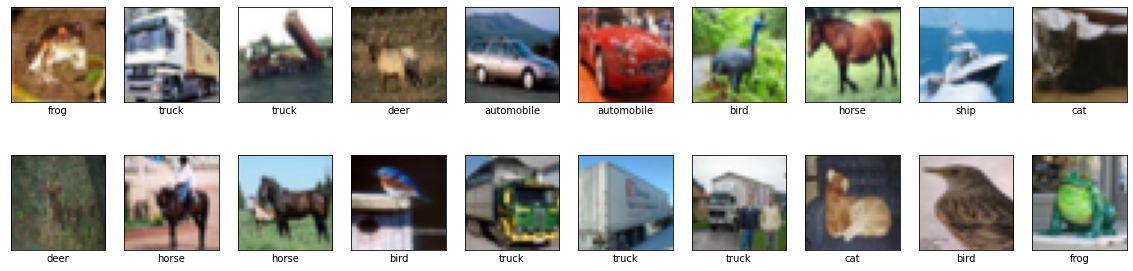

In [ ]:
plt.figure(figsize=(20,5))

for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plot image
    plt.imshow(X_train[i])
    #print label
    label= y_train[i,0]
    plt.xlabel(class_names_to_number[label])
plt.show()


## Setup Model Layers

### Activation Functions: https://www.tensorflow.org/api_docs/python/tf/keras/activations
- linear(...): Linear activation function (pass-through).
- relu(...): Applies the rectified linear unit activation function.
- elu(...): Exponential Linear Unit.
- sigmoid(...): Sigmoid activation function, $sigmoid(x) = 1 / (1 + exp(-x))$.
- tanh(...): Hyperbolic tangent activation function.
- softmax(...): Softmax converts a vector of values to a probability distribution.

### Choosing Activation Function (Common choices)
- DFFN: relu(...)
- CNN: relu(...)
- RNN: tanh(...), sigmoid(...)
- Sigmoid and Tanh are  more susceptible to vanishing gradient problem during training (prevent from learning)


### Layers: https://www.tensorflow.org/api_docs/python/tf/keras/layers
- InputLayer: Layer to be used as an entry point into a Network (a graph of layers).
- Conv1D: 1D convolution layer (e.g. temporal convolution).
- Conv2D: 2D convolution layer (e.g. spatial convolution over images).
- MaxPooling1D: Max pooling operation for 1D temporal data.
- MaxPooling2D: Max pooling operation for 2D spatial data.
- Flatten: Flattens the input. Does not affect the batch size.
- Dropout: Applies Dropout to the input.
- Dense: Just your regular densely-connected NN layer.

In [ ]:
input_shape = (32, 32, 3)
num_classes = 10

model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        #tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 flatten_13 (Flatten)        (None, 2048)            

## Set Optimizer and Evaluation Metrics

### Optimizers: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- Adam: Optimizer that implements the Adam algorithm.
- Adadelta: Optimizer that implements the Adadelta algorithm.
- SGD: Gradient descent (with momentum) optimizer.
- RMSprop: Optimizer that implements the RMSprop algorithm.


### Losses: https://www.tensorflow.org/api_docs/python/tf/keras/losses
- CategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.
- MeanSquaredError: Computes the mean of squares of errors between labels and predictions.
- MeanAbsoluteError: Computes the mean of absolute difference between labels and predictions.
- CosineSimilarity: Computes the cosine similarity between labels and predictions.

### Metrics: https://www.tensorflow.org/api_docs/python/tf/keras/metrics
- Accuracy: Calculates how often predictions equal labels.
- BinaryAccuracy: Calculates how often predictions match binary labels.
- Precision: Computes the precision of the predictions with respect to the labels.
- Recall: Computes the recall of the predictions with respect to the labels.
- MeanAbsoluteError: Computes the mean absolute error between the labels and predictions.
- MeanSquaredError: Computes the mean squared error between y_true and y_pred.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy', 'precision'])

## Train Model

In [ ]:
batch_size = 128
epochs = 10

hist = model.fit(X_train, y_train, 
                    epochs=15, batch_size=batch_size,
                    validation_data=(X_test, y_test))


Epoch 1/15
391/391 [==============================] - 5s 11ms/step - loss: 2.0404 - accuracy: 0.3571 - val_loss: 1.3704 - val_accuracy: 0.5071
Epoch 2/15
391/391 [==============================] - 4s 10ms/step - loss: 1.3098 - accuracy: 0.5310 - val_loss: 1.1758 - val_accuracy: 0.5833
Epoch 3/15
391/391 [==============================] - 4s 11ms/step - loss: 1.1487 - accuracy: 0.5948 - val_loss: 1.0519 - val_accuracy: 0.6373
Epoch 4/15
391/391 [==============================] - 4s 11ms/step - loss: 1.0284 - accuracy: 0.6393 - val_loss: 0.9967 - val_accuracy: 0.6484
Epoch 5/15
391/391 [==============================] - 4s 9ms/step - loss: 0.9395 - accuracy: 0.6745 - val_loss: 0.9828 - val_accuracy: 0.6668
Epoch 6/15
391/391 [==============================] - 4s 9ms/step - loss: 0.8677 - accuracy: 0.6997 - val_loss: 0.9197 - val_accuracy: 0.6911
Epoch 7/15
391/391 [==============================] - 4s 9ms/step - loss: 0.8069 - accuracy: 0.7191 - val_loss: 0.9381 - val_accuracy: 0.6812
Ep

In [ ]:
fit_history = pd.DataFrame(hist.history)
fit_history.head()

,loss,accuracy,val_loss,val_accuracy
0,2.040353,0.35712,1.370405,0.5071
1,1.309785,0.53096,1.175823,0.5833
2,1.148747,0.59476,1.051851,0.6373
3,1.028434,0.63934,0.996650,0.6484
4,0.939545,0.67448,0.982817,0.6668


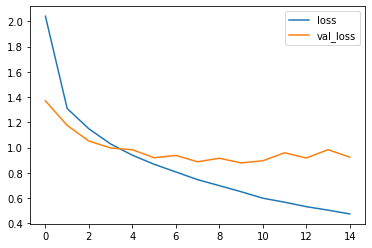

In [ ]:
fit_history[['loss', 'val_loss' ]].plot()

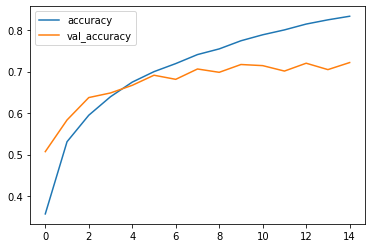

In [ ]:
fit_history[['accuracy', 'val_accuracy' ]].plot()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)    

print('train samples:', X_train.shape[0])
print('test samples:', X_test.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

train samples: 50000
test samples: 10000
Test loss: 0.9243081212043762
Test accuracy: 0.7215999960899353


In [ ]:
test_predictions = model.predict(X_test)   
test_predictions

array([[1.0944693e-03, 6.2199513e-05, 1.1384703e-02, ..., 2.0806599e-04,
        2.3751643e-03, 1.8976939e-04],
       [7.0792608e-05, 1.9476595e-04, 1.6984734e-07, ..., 9.3993537e-12,
        9.9970502e-01, 2.9229455e-05],
       [3.0187977e-02, 1.4435133e-01, 2.3360630e-04, ..., 1.9013986e-04,
        6.7587495e-01, 1.4638102e-01],
       ...,
       [1.3678908e-07, 7.7830471e-09, 4.2160251e-03, ..., 5.4456936e-03,
        2.5609262e-07, 3.6999062e-08],
       [1.2034494e-04, 9.9814582e-01, 3.6931253e-04, ..., 2.4468821e-07,
        2.1423546e-04, 7.7332719e-04],
       [1.5434086e-08, 3.9619247e-10, 9.6896256e-05, ..., 9.9785775e-01,
        1.7458947e-12, 2.0953216e-08]], dtype=float32)

In [ ]:
test_predictions = np.argmax(test_predictions, axis=1)
test_predictions

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
y_test.flatten()

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
test_result = pd.DataFrame({'y_act': y_test.flatten(), 'y_pred':test_predictions})
test_result.sample(5)

,y_act,y_pred
253,9,9
9081,7,7
3472,7,9
8771,6,6
1490,8,8


In [ ]:
test_result = test_result.replace(class_names_to_number)
test_result.sample(5)

,y_act,y_pred
1784,automobile,automobile
4149,truck,truck
9731,bird,bird
1341,deer,deer
6617,deer,deer


## Model Evaluation

In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck,All
y_act,,,,,,,,,,,
airplane,758,17,44,29,23,8,5,12,61,43,1000
automobile,9,851,2,12,0,5,6,6,19,90,1000
bird,61,7,617,59,54,94,50,25,14,19,1000
cat,16,8,74,534,43,194,50,41,16,24,1000
deer,14,5,74,84,610,62,56,73,12,10,1000
dog,8,4,43,152,27,689,12,47,11,7,1000
frog,3,4,64,80,24,27,772,9,8,9,1000
horse,16,2,29,53,41,97,4,741,1,16,1000
ship,63,32,17,13,2,9,6,5,811,42,1000


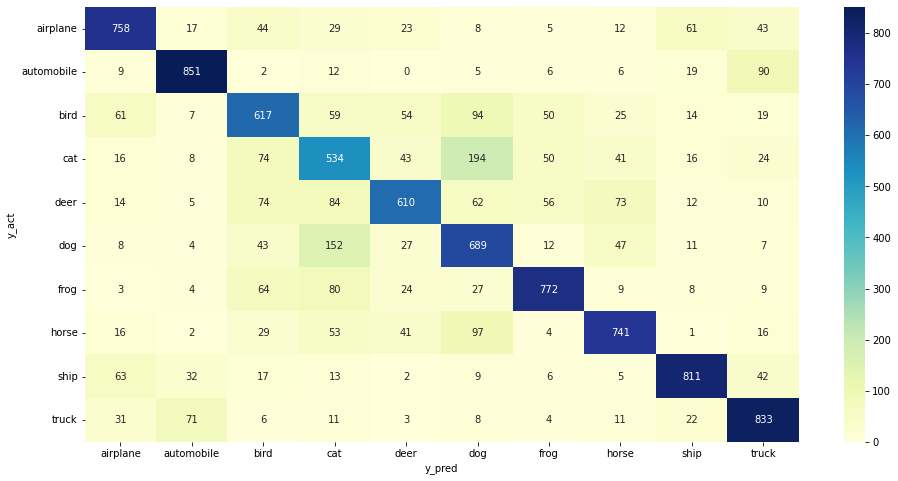

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(pd.crosstab(test_result.y_act, test_result.y_pred, margins=False), annot=True, cmap="YlGnBu", fmt=".0f")

In [ ]:
class_label = cfm.index
TP = cfm.values.diagonal()
class_samples = cfm.loc[:,'All'].values
class_predicted = cfm.loc['All',:].values

model_performace = pd.DataFrame({"Clas":class_label, "TP":TP, "Samples":class_samples, "Predicted":class_predicted})
model_performace["Precision"] = model_performace["TP"]/model_performace["Predicted"]
model_performace["Recall"] = model_performace["TP"]/model_performace["Samples"]
model_performace.style.background_gradient()

,Clas,TP,Samples,Predicted,Precision,Recall
0,airplane,758,1000,979,0.774259,0.758000
1,automobile,851,1000,1001,0.850150,0.851000
2,bird,617,1000,970,0.636082,0.617000
3,cat,534,1000,1027,0.519961,0.534000
4,deer,610,1000,827,0.737606,0.610000
5,dog,689,1000,1193,0.577536,0.689000
6,frog,772,1000,965,0.800000,0.772000
7,horse,741,1000,970,0.763918,0.741000
8,ship,811,1000,975,0.831795,0.811000
9,truck,833,1000,1093,0.762123,0.833000


## Check Results

* Identify Ambigious Casses
* Check examples of false positives (model confused predictions)


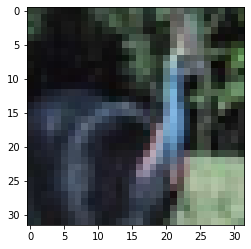

In [ ]:
test_result['Image'] = list(X_test)
plt.imshow(test_result.sample()['Image'].values[0])

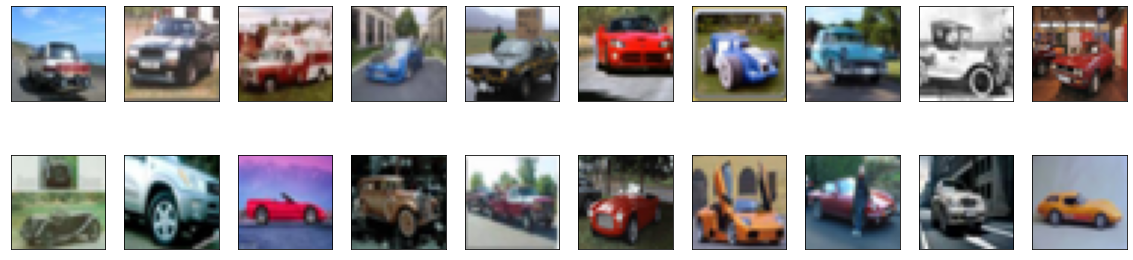

In [ ]:
sample_images = test_result.query("y_act=='automobile' and y_pred=='truck'").sample(20)['Image'].values

plt.figure(figsize=(20,5))

for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plot image
    plt.imshow(sample_images[i])

plt.show()

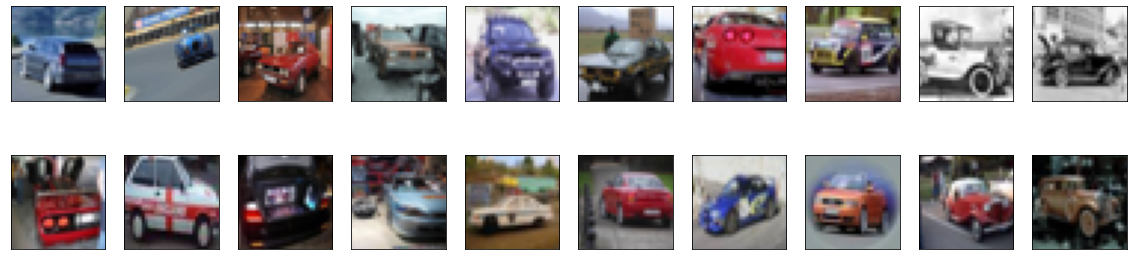

In [ ]:
sample_images = test_result.query("y_act=='automobile' and y_pred=='truck'").sample(20)['Image'].values

plt.figure(figsize=(20,5))

for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plot image
    plt.imshow(sample_images[i])

plt.show()

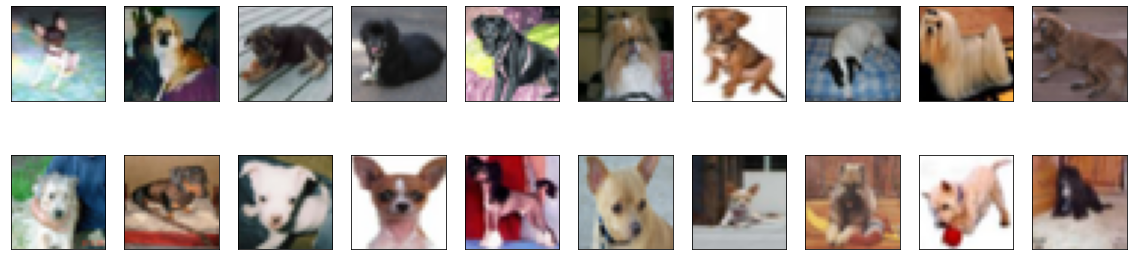

In [ ]:
sample_images = test_result.query("y_act=='dog' and y_pred=='cat'").sample(20)['Image'].values

plt.figure(figsize=(20,5))

for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plot image
    plt.imshow(sample_images[i])

plt.show()

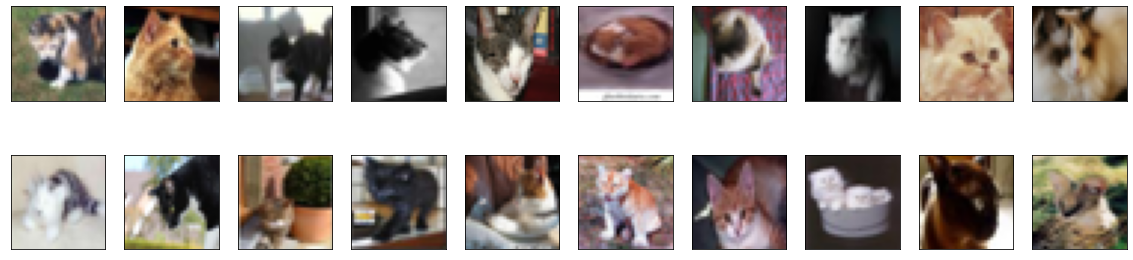

In [ ]:
sample_images = test_result.query("y_act=='cat' and y_pred=='dog'").sample(20)['Image'].values

plt.figure(figsize=(20,5))

for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plot image
    plt.imshow(sample_images[i])

plt.show()

<hr/>
Last update 2022-06-30 by Sumudu Tennakoon

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.